In [2]:

#imports
import pennylane as qml
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
import numpy as np

In [ ]:
#Example 1

In [3]:
def circuit():
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[1, 3])
#     qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[0, 2])
    return qml.probs(wires=[0, 1, 2, 3])

print(qml.draw(circuit)())

0: ─╭●──────────╭●─┤ ╭Probs
1: ─╰X─╭●────╭●─│──┤ ├Probs
2: ────╰X─╭●─│──╰X─┤ ├Probs
3: ───────╰X─╰X────┤ ╰Probs


In [35]:
#Suppose we have physical qubit connectivity as 
#                     0---1---2---3



dev = qml.device('default.qubit', wires=[0, 1, 2, 3])
transformed_circuit = qml.transforms.transpile(circuit, coupling_map=[(0, 1), (1, 2), (3, 2)])
transformed_qnode = qml.QNode(transformed_circuit, dev)
print(qml.draw(transformed_qnode)())

0: ─╭●────────────────────────────╭●─┤ ╭Probs
1: ─╰X─╭●──────────╭●───────╭SWAP─╰X─┤ ├Probs
2: ────╰X─╭●─╭SWAP─╰X─╭SWAP─╰SWAP────┤ ├Probs
3: ───────╰X─╰SWAP────╰SWAP──────────┤ ╰Probs


In [ ]:
#Example 2

In [4]:
def circuit():
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[1, 3])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[0, 3])
    qml.CNOT(wires=[0, 4])
    return qml.probs(wires=[0, 1, 2, 3, 4])

print(qml.draw(circuit)())

0: ─╭●──────────╭●─╭●─┤ ╭Probs
1: ─╰X─╭●─╭●────│──│──┤ ├Probs
2: ─╭●─│──╰X─╭●─│──│──┤ ├Probs
3: ─╰X─╰X────╰X─╰X─│──┤ ├Probs
4: ────────────────╰X─┤ ╰Probs


In [ ]:
#Suppose we have physical qubit connectivity as 
#                     0---1
#                     |   |
#                     3---2
#                         \
#                         4

In [5]:
dev = qml.device('default.qubit', wires=[0, 1, 2, 3,4])
transformed_circuit = qml.transforms.transpile(circuit, coupling_map=[(0, 1), (1, 2), (3, 2), (3, 0),(2,4)])
transformed_qnode = qml.QNode(transformed_circuit, dev)
print(qml.draw(transformed_qnode)())

0: ─╭●──────────────────────╭●─────────────╭●─┤ ╭Probs
1: ─╰X───────╭●───────╭●────│────────╭SWAP─╰X─┤ ├Probs
2: ─╭●─╭SWAP─╰X─╭SWAP─╰X─╭●─│──╭SWAP─╰SWAP────┤ ├Probs
3: ─╰X─╰SWAP────╰SWAP────╰X─╰X─│──────────────┤ ├Probs
4: ────────────────────────────╰SWAP──────────┤ ╰Probs


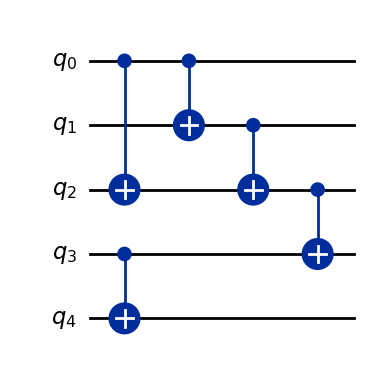

In [4]:
# Example of creating dependency graph 
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer,circuit_drawer
import matplotlib as mpl
 
q = QuantumRegister(5, 'q')
circ = QuantumCircuit(q)

circ.cx(q[0], q[2])
circ.cx(q[3],q[4])
circ.cx(q[0], q[1])
circ.cx(q[1], q[2])
circ.cx(q[2], q[3])

circuit_drawer(circ, output = 'mpl')
# dag = circuit_to_dag(circ)
# dag_drawer(dag)

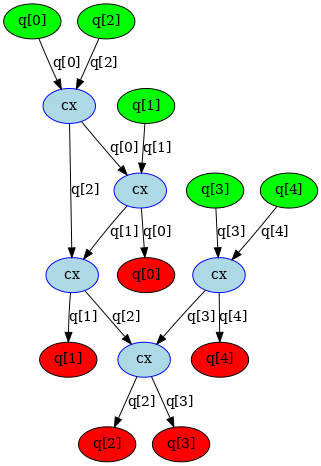

In [5]:
# Draw it's Dependency graph
dag = circuit_to_dag(circ)
dag_drawer(dag)

     ┌───┐     ┌─┐           
q_0: ┤ H ├──■──┤M├───────────
     └───┘┌─┴─┐└╥┘┌─────────┐
q_1: ─────┤ X ├─╫─┤ Rz(0.5) ├
          └───┘ ║ └─────────┘
q_2: ───────────╫────────────
                ║            
c: 3/═══════════╩════════════
                0            


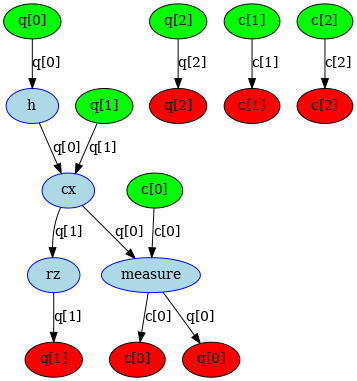

In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer,circuit_drawer
 
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
circ = QuantumCircuit(q, c)
circ.h(q[0])
circ.cx(q[0], q[1])
circ.measure(q[0], c[0])
circ.rz(0.5, q[1])
print(circuit_drawer(circ))
dag = circuit_to_dag(circ)
dag_drawer(dag)

In [ ]:
# Transform the circuit with given basis gates

In [8]:
# Define Circuit
circuit = QuantumCircuit(1)
circuit.ry(Parameter('theta'), 0)

# Get Expantion for given gates
rxrz_basis = transpile(circuit, basis_gates=['cx', 'id', 'rz', 'x', 'sx'])
rxrz_basis.draw()

global phase: 3π/2
   ┌────┐┌───────────────┐┌────┐┌────────┐
q: ┤ √X ├┤ Rz(theta + π) ├┤ √X ├┤ Rz(3π) ├
   └────┘└───────────────┘└────┘└────────┘

In [22]:
def circuit():
    qml.CNOT(wires=[0, 1])
    qml.PauliY(wires=0)
    qml.CNOT(wires=[2, 3])
    qml.Hadamard(wires=3)
    qml.CNOT(wires=[1, 2])
    qml.PauliZ(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=2)
    qml.CNOT(wires=[3,1])
    qml.PauliZ(wires=2)
    qml.CNOT(wires=[0, 3])
    return qml.probs(wires=[0, 1, 2, 3])


dev = qml.device('default.qubit', wires=4)
qnode = qml.QNode(circuit, dev)
print(qml.draw(qnode)())

0: ─╭●──Y──Z───────╭●─┤ ╭Probs
1: ─╰X─╭●──X─╭X────│──┤ ├Probs
2: ─╭●─╰X──H─│───Z─│──┤ ├Probs
3: ─╰X──H────╰●────╰X─┤ ╰Probs


In [25]:
compiled_circuit = qml.compile(basis_set=["CNOT","RX" ,"RY", "RZ"])(circuit)
compiled_qnode = qml.QNode(compiled_circuit, dev)
print(qml.draw(compiled_qnode)())

0: ─╭●──RZ(1.57)──RY(3.14)──────────────────────────────────╭●──RZ(4.71)─┤ ╭Probs
1: ─╰X─╭●─────────RZ(1.57)──RX(3.14)──RZ(1.57)─╭X───────────│────────────┤ ├Probs
2: ─╭●─╰X─────────RZ(1.57)──RX(1.57)──RZ(4.71)─│────────────│────────────┤ ├Probs
3: ─╰X──RZ(1.57)──RX(1.57)─────────────────────╰●──RZ(1.57)─╰X───────────┤ ╰Probs
